# 在AWS 中国区域部署Stable diffusion 模型

##### 所需资源 EC2 G4dn.xlarge (只推理), 需要训练dreambooth 建议G4dn.2xlarge 以上
#####  EC2 AMI - Deep Learning AMI GPU PyTorch 1.13.1 (Ubuntu 20.04) 20230315 (ami-088232cd83858d48c ) 目前最新的deep learning AMI
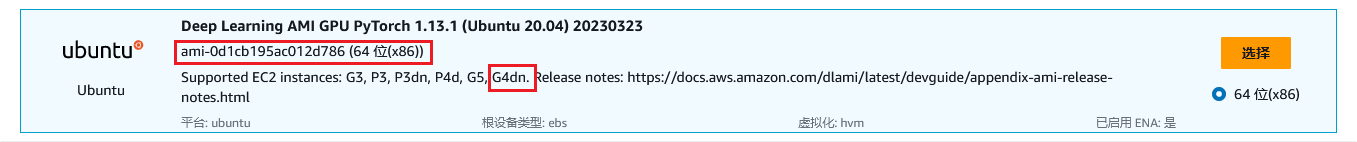
#####  EC2 EBS 建议配置GP3 150GB 以上
#####  EC2 安全组  新增 Jupyter notebook 开放端口 8888, Stable diffusion 开放端口9000
启动后, 正常配置秘钥对, ssh 连接实例

##### 启动预先安装 conda 环境
在deep learning AMI 中, 亚马逊云科技已经预装了深度学习的框架, 其中包含 Nvidia 中cuda, cudnn, 以及对应pytorch, torch, conda


以指令列出现有conda 环境, base 为基本环境, deep learning 相关包安装在conda pytorch 中
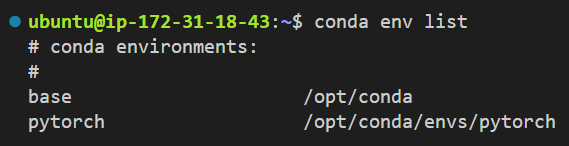

##### 环境切换至Conda pytorch 中, 并唤起预安装 jupyter notebook

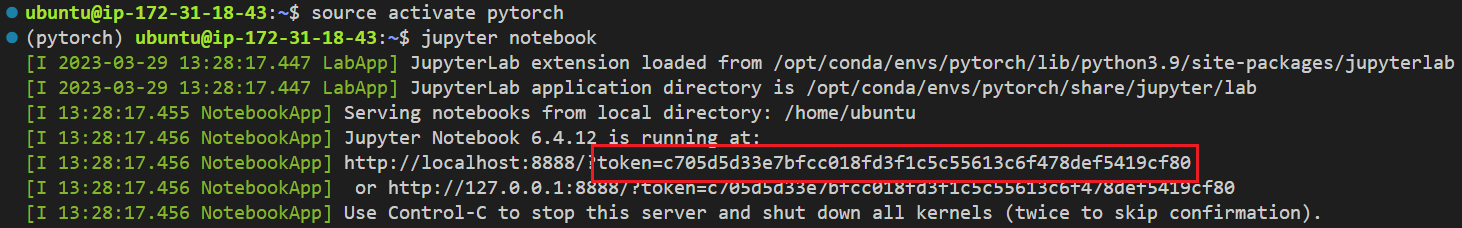

##### 以token 登入jupyter notebook
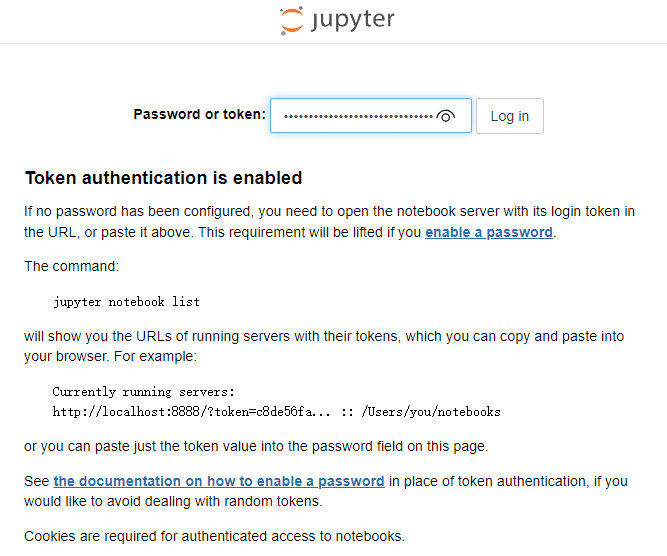


##### 上传并打开现有ipynb 档案
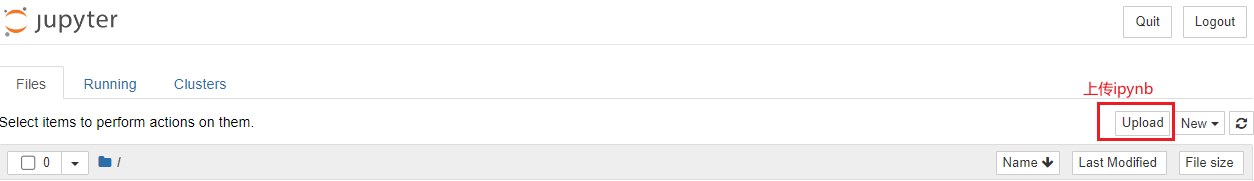


##### 在环境设置中, 首先需确定Cuda, pytorch 是否正确安装,如果没有正确安装,GPU 将无法正常使用

In [1]:
## 确认cuda, pytorch 等是否正确安装
import torch
print(torch.__version__)
torch.cuda.is_available()

1.13.1


True

###### 从github 下载stable diffusion Web UI 最新版


In [5]:
## 下载Stable diffusion Web UI project
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui

Cloning into 'stable-diffusion-webui'...
remote: Enumerating objects: 17435, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 17435 (delta 83), reused 95 (delta 48), pack-reused 17275
Receiving objects: 100% (17435/17435), 28.09 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (12160/12160), done.


###### 从huggingface 网站下载Stable diffustion模型
可以从Civitai.com 下载dreambooth, textual inversion, lora, hypernetwork 等, 放到相对应的位置中
但需注意fine tuning 出来的模型都有相对应的Stable diffusion 模型版本, 如果版本不匹配, 将会报错

In [6]:
##从huggingface 下载model 
%cd ~/stable-diffusion-webui/models/Stable-diffusion/
!wget https://huggingface.co/stabilityai/stable-diffusion-2-1-base/resolve/main/v2-1_512-ema-pruned.ckpt

/home/ubuntu/stable-diffusion-webui/models/Stable-diffusion
--2023-03-25 09:55:46--  https://huggingface.co/stabilityai/stable-diffusion-2-1-base/resolve/main/v2-1_512-ema-pruned.ckpt
Resolving huggingface.co (huggingface.co)... 3.216.111.67, 34.203.133.210, 35.173.225.216, ...
Connecting to huggingface.co (huggingface.co)|3.216.111.67|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/24/cb/24cbc2f7542236eb613b4f16b6802d7c2bef443e86cf9d076719733866e66c3a/88ecb782561455673c4b78d05093494b9c539fc6bfc08f3a9a4a0dd7b0b10f36?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27v2-1_512-ema-pruned.ckpt%3B+filename%3D%22v2-1_512-ema-pruned.ckpt%22%3B&Expires=1679996540&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzI0L2NiLzI0Y2JjMmY3NTQyMjM2ZWI2MTNiNGYxNmI2ODAyZDdjMmJlZjQ0M2U4NmNmOWQwNzY3MTk3MzM4NjZlNjZjM2EvODhlY2I3ODI1NjE0NTU2NzNjNGI3OGQwNTA5MzQ5NGI5YzUzOWZjNmJmYzA4ZjNhO

##### Stable diffusion Web UI 需要安装相关python 包, 但如果从pypi.org 下载速度较慢, 建议设置国内源

In [7]:
## 设定清华pip源
!pip3 config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple

Writing to /home/ubuntu/.config/pip/pip.conf


##### 运行Stable diffusion 前需安装相关python 包, 可能会花费较长时间

In [ ]:
##安装包并运行web ui, 指定端口, 允许插件
!python3 /home/ubuntu/stable-diffusion-webui/launch.py --port 9000 --listen --enable-insecure-extension-access

Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:39:03) 
[GCC 11.3.0]
Commit hash: <none>
Installing requirements for Web UI
Launching Web UI with arguments: --port 9000 --listen --enable-insecure-extension-access
No module 'xformers'. Proceeding without it.
Loading weights [88ecb78256] from /home/ubuntu/stable-diffusion-webui/models/Stable-diffusion/v2-1_512-ema-pruned.ckpt
Creating model from config: /home/ubuntu/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/configs/stable-diffusion/v2-inference.yaml
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 865.91 M params.
Applying cross attention optimization (Doggettx).
Textual inversion embeddings loaded(0): 
Model loaded in 43.4s (load weights from disk: 38.8s, find config: 1.8s, create model: 0.3s, apply weights to model: 1.3s, apply half(): 0.6s, move model to device: 0.7s).
Running on local URL:  http://0.0.0.0:9000

To create a public link, set `share=True` in `launch()`.
Startu